# Chapter 3 - Ex2: Predicting Customer Churn
## Cho dữ liệu Churn_Modelling.csv chứa thông tin của 10000 khách hàng của công ty.
+ Là phụ trách bộ phận chăm sóc khách hàng bạn nhận thấy việc phải xây dựng một mô hình Machine Learning để dự đoán việc khách hàng sẽ ra đi hay ở lại. 
+ Công việc này vô cùng quan trọng vì giữ chân được khách hàng càng lâu doanh nghiệp của bạn sẽ càng tiết kiệm được chi phí và tăng doanh thu.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [2]:
churn = pd.read_csv('Data/Churn_Modelling.csv', index_col=0)
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [10]:
churn['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


## <span style='color:yellow'>Output: churn['Exited']
## <span style='color:yellow'>Input: other columns except CustomerId and Surname

In [4]:
x = churn.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = churn['Exited']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE #Use Smote to upsample, to handle imbalanced data
from imblearn.pipeline import Pipeline

logreg_pipe = Pipeline([
('Label_Enconder', make_column_transformer( (OneHotEncoder(handle_unknown='ignore'), ['Geography', 'Gender']), remainder='passthrough', force_int_remainder_cols=False)),
('SMOTE_upsample', SMOTE()),
('Robust_Scaler', RobustScaler()),
('Logistic_Regression', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

logreg_pipe.fit(x_train, y_train)

/home/long/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('Label_Enconder',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender'])])),
                ('SMOTE_upsample', SMOTE()), ('Robust_Scaler', RobustScaler()),
                ('Logistic_Regression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


y_test_pred = logreg_pipe.predict(x_test)
y_test_proba = logreg_pipe.predict_proba(x_test)

print(pd.DataFrame({'Y_test_true':y_test, 'Y_test_pred':y_test_pred}))

print(f'\nAccuracy_score on test set: {accuracy_score(y_test, y_test_pred)}')

labels = ['Stay', 'Exit']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                    index=labels,
                    columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')

print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

           Y_test_true  Y_test_pred
RowNumber                          
9954                 0            0
3851                 0            0
4963                 0            0
3887                 0            0
5438                 0            0
...                ...          ...
5274                 0            0
8015                 0            0
8985                 0            0
6499                 0            0
6328                 0            0

[3000 rows x 2 columns]

Accuracy_score on test set: 0.7246666666666667

Confusion matrix:
       Stay  Exit
Stay  1757   616
Exit   210   417

Classification report:
               precision    recall  f1-score   support

        Stay       0.89      0.74      0.81      2373
        Exit       0.40      0.67      0.50       627

    accuracy                           0.72      3000
   macro avg       0.65      0.70      0.66      3000
weighted avg       0.79      0.72      0.75      3000



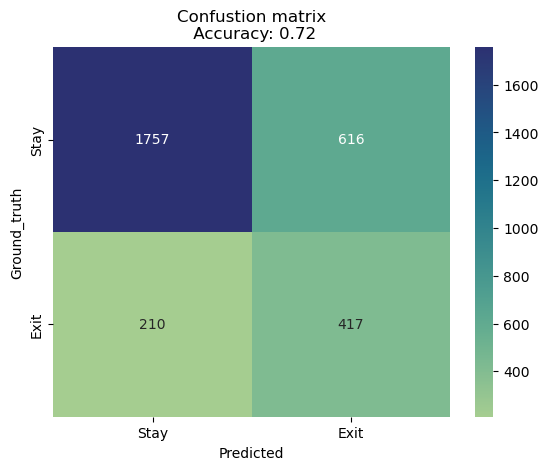

In [51]:
sbn.heatmap(data=cm_df, annot=True, fmt='g', cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Ground_truth')
plt.title(f'Confustion matrix\n Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')
plt.show()
#fmt='g' to show the number as normal format, not scientific notation
#f'{accuracy_score(y_test, y_test_pred):.2f}' the str:.2f to limit 2 float numbers (decimal numbers)

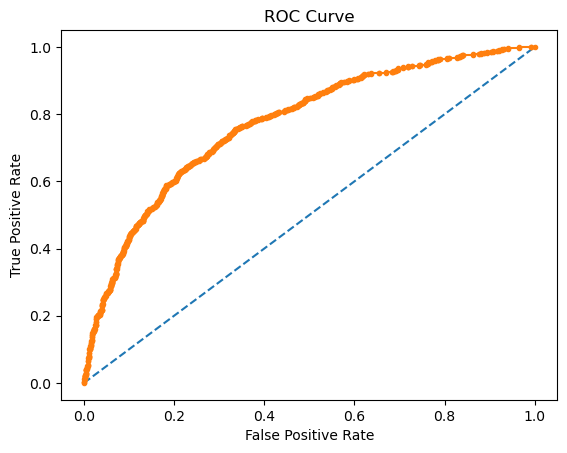

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_test_proba[:,1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Comments:
+ After using SMOTE, the accuracy is about 0.72, not so high
+ The precision on class "Exit" is low, only 0.4
+ The ROC Curve is not good